# MachineLearning

Klassifikationsproblem

Extrovertiert oder Introvertiert

Teilnehmer anhand ihrer Angaben in zwei Gruppen einteilen

Introvertiert: 1-2, Extrovertiert:3-5

Fragebogen: 1: sehr introvertiert, 5: sehr extrovertiert

***

In [38]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb  # data visualization library  
import matplotlib.pyplot as plt  # data visualization library 

In [43]:
filename = "./data/survery_data_annonymized_230626_clean.csv"
data = pd.read_csv(filename)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Alter                        62 non-null     int64 
 1   Geschlecht                   62 non-null     object
 2   Pseudonym                    62 non-null     object
 3   Position                     62 non-null     object
 4   Studiengang                  62 non-null     object
 5   Sportlichkeit                62 non-null     int64 
 6   Sportarten                   62 non-null     object
 7   Fav_Sportart                 62 non-null     object
 8   Gesunde_Ernaehrung           62 non-null     int64 
 9   Essen_gehen                  62 non-null     int64 
 10  Kochen                       62 non-null     int64 
 11  Feiern                       62 non-null     int64 
 12  Fav_Essen                    62 non-null     object
 13  Musik                        62 non-n

In [21]:
#Sportarten_Liste ohne Floorball
sportarten_list = ["Basketball",
              "Fußball",
              "Handball",
              "Football",
              "Hockey",
              "Volleyball",
              "Tennis",
              "Yoga",
              "Kampfsport",
              "Tanzen",
              "Leichtathletik",
              "Bouldern/Klettern",
              "Schwimmen",
              "Wassersport",
              "Reiten",
              "Wintersport",
              "Rennrad/Mountainbike"]

In [22]:
data["Introvertiert_Extrovertiert"]

0     3
1     3
2     4
3     3
4     3
     ..
57    2
58    3
59    3
60    3
61    2
Name: Introvertiert_Extrovertiert, Length: 62, dtype: int64

In [23]:
data_num = data.select_dtypes(include='number')
data_num.columns

Index(['Alter', 'Sportlichkeit', 'Gesunde_Ernaehrung', 'Essen_gehen', 'Kochen',
       'Feiern', 'Musik', 'Lesen', 'Darstellende_Kunst', 'Filme',
       'Bildende_Kunst', 'Museen', 'Videospiele', 'Soziale_Medien',
       'Technologie', 'Astronomie', 'Naturwissenschaften',
       'Soziales_Engagement', 'Soziale_Gerechtigkeit',
       'Introvertiert_Extrovertiert', 'FOMO', 'Spontan', 'Verwirrt',
       'Glücklich', 'Geduldig', 'Streitlustig', 'Abenteuerlustig',
       'Studium_Zweifel', 'Studium_Zufriedenheit', 'Akademische_Laufbahn',
       'Lerngruppe', 'Prokrastination', 'Abgaben_spaet',
       'Neugier_Lebensmittel', 'Natur', 'Verreisen', 'Handwerk',
       'Sprachnachrichten', 'Wichtigkeit_Geld', 'Geschlecht_num',
       'Position_num', 'Studiengang_num', 'Basketball', 'Fußball', 'Handball',
       'Football', 'Hockey', 'Volleyball', 'Tennis', 'Yoga', 'Kampfsport',
       'Tanzen', 'Leichtathletik', 'Bouldern/Klettern', 'Schwimmen',
       'Wassersport', 'Reiten', 'Wintersport', 'Re

In [24]:
INFP_ESFJ = []

for i in data["Introvertiert_Extrovertiert"]:
    if(i == 1 or i == 2):
        INFP_ESFJ.append("Introvertiert")
    else:
        INFP_ESFJ.append("Extrovertiert")

data["Introvertiert_oder_Extrovertiert"] = INFP_ESFJ

<Axes: ylabel='count'>

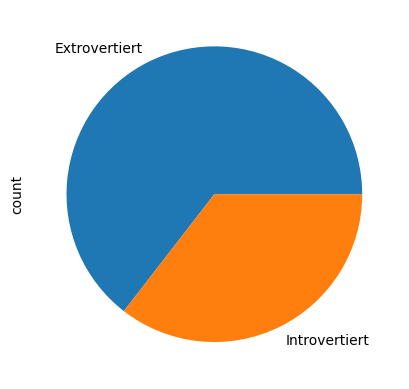

In [25]:
data.value_counts("Introvertiert_oder_Extrovertiert").plot(kind="pie")

## Klassifikationsproblem

Feature: Introvertiert oder Extrovertiert

Teilnehmer zuordnen, ob sie extroviertier oder introvertiert sind

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [62]:
#Dependencies RandomForest, DecisionTree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [28]:
#Dependencies Regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold #Cross Validation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer

In [29]:
X = data_num.copy() # Nur Feature mit Zahlenwerten verwenden
X = X.drop(["Introvertiert_Extrovertiert"], axis=1)

y = data.copy()["Introvertiert_Extrovertiert"]

X.shape, y.shape 

((62, 58), (62,))

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 58 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Alter                  62 non-null     int64
 1   Sportlichkeit          62 non-null     int64
 2   Gesunde_Ernaehrung     62 non-null     int64
 3   Essen_gehen            62 non-null     int64
 4   Kochen                 62 non-null     int64
 5   Feiern                 62 non-null     int64
 6   Musik                  62 non-null     int64
 7   Lesen                  62 non-null     int64
 8   Darstellende_Kunst     62 non-null     int64
 9   Filme                  62 non-null     int64
 10  Bildende_Kunst         62 non-null     int64
 11  Museen                 62 non-null     int64
 12  Videospiele            62 non-null     int64
 13  Soziale_Medien         62 non-null     int64
 14  Technologie            62 non-null     int64
 15  Astronomie             62 non-null     int

In [31]:
#Grid Search for best hyperparameters

kneighbors_classifier = KNeighborsClassifier()
grid = GridSearchCV(estimator=kneighbors_classifier,
                   param_grid={
                       'n_neighbors': [1, 3, 5, 7, 10, 15],
                       'weights': ['uniform', 'distance']
                   },
                   cv=3, 
                    refit="MAE",
                   verbose=2)

scaler = StandardScaler().fit(X)
X_train_class_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)

X_train_class_scaled_np = X_train_class_scaled.to_numpy()

grid.fit(X_train_class_scaled_np, y)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
pd.DataFrame(grid.cv_results_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weig

/Users/Laura/opt/anaconda3/envs/dataScience/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END .....................n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.1s
[CV] END ....................n_neighbors=10, weights=uniform; total time=   0.0s
[CV] END ...................n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ...................n_neighbors=10, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ...................

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001479,0.000435,0.003592,0.000385,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.380952,0.428571,0.45,0.419841,0.028857,2
1,0.001877,0.000759,0.004915,0.002955,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.380952,0.428571,0.45,0.419841,0.028857,2
2,0.001730,0.000774,0.020939,0.015223,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.428571,0.380952,0.35,0.386508,0.032316,12
3,0.000764,0.000056,0.003184,0.000784,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.428571,0.428571,0.40,0.419048,0.013469,4
4,0.001342,0.000519,0.006324,0.001473,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.428571,0.333333,0.40,0.387302,0.039904,11
5,0.001057,0.000214,0.003987,0.002035,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.476190,0.428571,0.40,0.434921,0.031427,1
6,0.002711,0.000254,0.007294,0.001218,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.428571,0.428571,0.40,0.419048,0.013469,4
7,0.003553,0.003327,0.006026,0.001910,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.333333,0.333333,0.50,0.388889,0.078567,8
8,0.002864,0.001119,0.020551,0.022297,10,uniform,"{'n_neighbors': 10, 'weights': 'uniform'}",0.476190,0.380952,0.35,0.402381,0.053699,7
9,0.001103,0.000132,0.002762,0.000334,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",0.476190,0.380952,0.40,0.419048,0.041148,4


/Users/Laura/opt/anaconda3/envs/dataScience/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


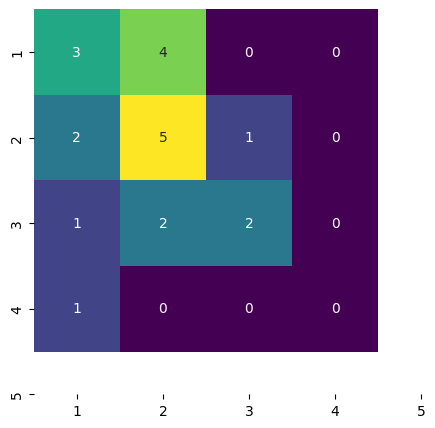

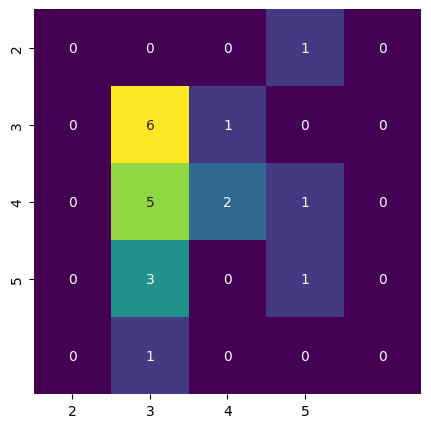

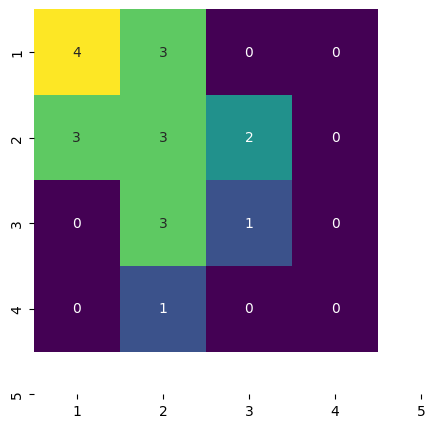

In [36]:
# Machine Leanring Model KNeighors Classifier
kneighbor_classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Cross Validation for test-splits
skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train_class_scaled, y):
    X_train, X_test = X_train_class_scaled.iloc[train_index], X_train_class_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # machine learning model training and evaluation code here
    # X_train, y_train for training and X_test, y_test for testing/validation
    
    kneighbor_classifier.fit(X_train, y_train)
    y_class_predicted = kneighbor_classifier.predict(X_test)
    
    fig, ax = plt.subplots(figsize=(5, 5))

    sb.heatmap(confusion_matrix(y_test, y_class_predicted),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=kneighbor_classifier.classes_,
           yticklabels=kneighbor_classifier.classes_)
    

In [44]:
X = data_num.copy() # Nur Feature mit Zahlenwerten verwenden
X = X.drop(["Studiengang_num"], axis=1)

y = data.copy()["Studiengang_num"]

X.shape, y.shape 

((62, 58), (62,))

In [64]:
#Grid Search for best hyperparameters

forest_classifier = RandomForestClassifier()
grid = GridSearchCV(estimator=forest_classifier,
                   param_grid={
                       'max_depth': [1, 3, 5, 7, 10, 15],
                       'n_estimators': [50, 70, 100, 120]
                   },
                   cv=3, 
                    refit="MAE",
                   verbose=2)

scaler = StandardScaler().fit(X)
X_train_class_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)

#X_train_class_scaled_np = X_train_class_scaled.to_numpy()

grid.fit(X_train_class_scaled, y)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
pd.DataFrame(grid.cv_results_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.2s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.1s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.1s
[CV] END .......................max_depth=1, n_estimators=70; total time=   0.1s
[CV] END .......................max_depth=1, n_estimators=70; total time=   0.2s
[CV] END .......................max_depth=1, n_estimators=70; total time=   0.1s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=1, n_estimators=120; total time=   0.2s
[CV] END ......................max_depth=1, n_estimators=120; total time=   0.2s
[CV] END ......................max_depth=1, n_es

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.139665,0.038244,0.012960,0.008332,1,50,"{'max_depth': 1, 'n_estimators': 50}",0.571429,0.571429,0.60,0.580952,0.013469,21
1,0.111366,0.020462,0.009518,0.000800,1,70,"{'max_depth': 1, 'n_estimators': 70}",0.571429,0.523810,0.55,0.548413,0.019473,23
2,0.166089,0.024068,0.013344,0.001996,1,100,"{'max_depth': 1, 'n_estimators': 100}",0.571429,0.571429,0.60,0.580952,0.013469,21
3,0.186575,0.019503,0.012746,0.000447,1,120,"{'max_depth': 1, 'n_estimators': 120}",0.571429,0.523810,0.55,0.548413,0.019473,23
4,0.133074,0.045103,0.025250,0.024147,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.619048,0.571429,0.65,0.613492,0.032316,12
5,0.152408,0.056066,0.014208,0.003818,3,70,"{'max_depth': 3, 'n_estimators': 70}",0.619048,0.571429,0.60,0.596825,0.019570,19
6,0.199630,0.047627,0.020538,0.008651,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.619048,0.619048,0.70,0.646032,0.038161,1
7,0.273654,0.058874,0.017597,0.003215,3,120,"{'max_depth': 3, 'n_estimators': 120}",0.619048,0.619048,0.65,0.629365,0.014591,9
8,0.084552,0.010569,0.008023,0.000568,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.619048,0.619048,0.70,0.646032,0.038161,1
9,0.120212,0.025760,0.008911,0.000407,5,70,"{'max_depth': 5, 'n_estimators': 70}",0.619048,0.619048,0.70,0.646032,0.038161,1


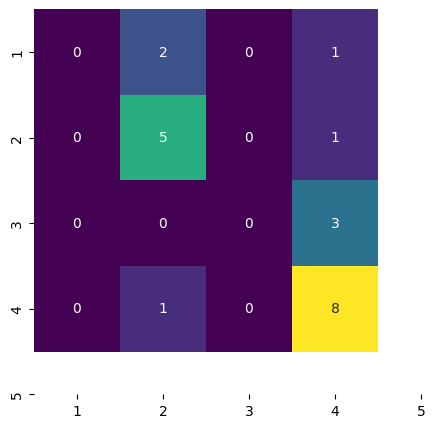

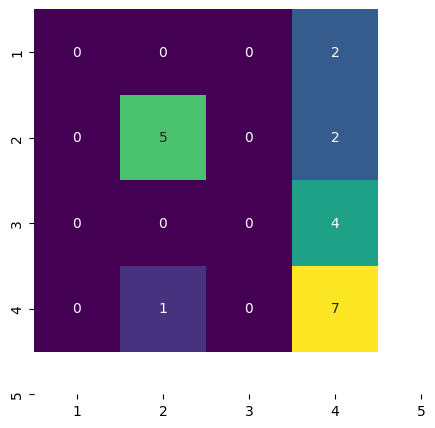

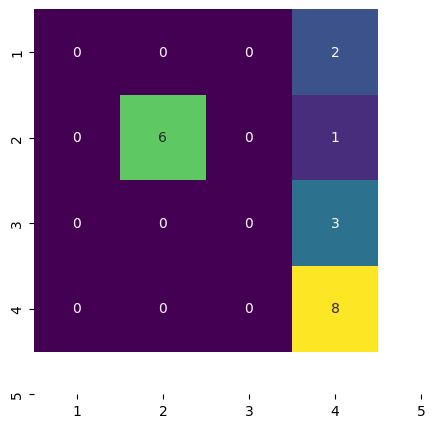

In [65]:
# Machine Leanring Model DecisionTreeClassifier
forest_class = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)

# Cross Validation for test-splits
skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train_class_scaled, y):
    X_train, X_test = X_train_class_scaled.iloc[train_index], X_train_class_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # machine learning model training and evaluation code here
    # X_train, y_train for training and X_test, y_test for testing/validation
    
    forest_class.fit(X_train, y_train)
    y_class_predicted = forest_class.predict(X_test)
    
    fig, ax = plt.subplots(figsize=(5, 5))

    sb.heatmap(confusion_matrix(y_test, y_class_predicted),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=kneighbor_classifier.classes_,
           yticklabels=kneighbor_classifier.classes_)

In [67]:
X = data_num.copy() # Nur Feature mit Zahlenwerten verwenden
X = X.drop(["Studiengang_num"], axis=1)

y = data.copy()["Studiengang_num"]

X.shape, y.shape 

((62, 58), (62,))

In [69]:
#Grid Search for best hyperparameters

tree_classifier = DecisionTreeClassifier()
grid = GridSearchCV(estimator=tree_classifier,
                   param_grid={
                       'max_depth': [3, 5, 7, 10, 15]
                   },
                   cv=3, 
                    refit="MAE",
                   verbose=2)

scaler = StandardScaler().fit(X)
X_train_class_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)



grid.fit(X_train_class_scaled, y)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
pd.DataFrame(grid.cv_results_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=7; total time=   0.0s
[CV] END ........................................max_depth=7; total time=   0.0s
[CV] END ........................................max_depth=7; total time=   0.0s
[CV] END .......................................max_depth=10; total time=   0.0s
[CV] END .......................................max_depth=10; total time=   0.0s
[CV] END .......................................m

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004737,0.000965,0.012208,0.011859,3,{'max_depth': 3},0.428571,0.571429,0.40,0.466667,0.074991,1
1,0.005957,0.003345,0.002575,0.000352,5,{'max_depth': 5},0.428571,0.476190,0.30,0.401587,0.074417,3
2,0.005757,0.001608,0.006160,0.005869,7,{'max_depth': 7},0.476190,0.476190,0.25,0.400794,0.106627,4
3,0.003578,0.000141,0.003386,0.001288,10,{'max_depth': 10},0.476190,0.476190,0.30,0.417460,0.083057,2
4,0.002969,0.000262,0.004348,0.002019,15,{'max_depth': 15},0.380952,0.428571,0.30,0.369841,0.053074,5


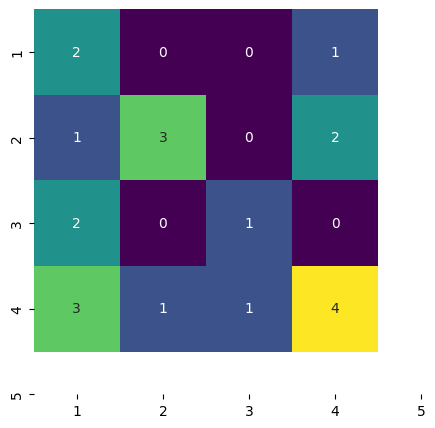

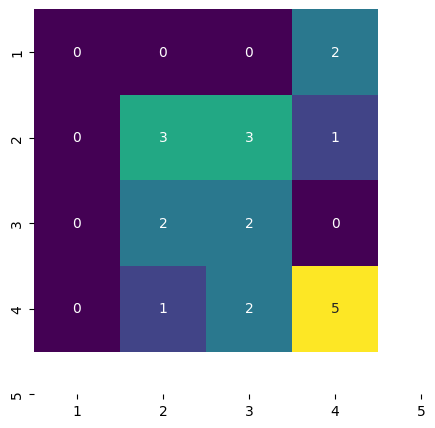

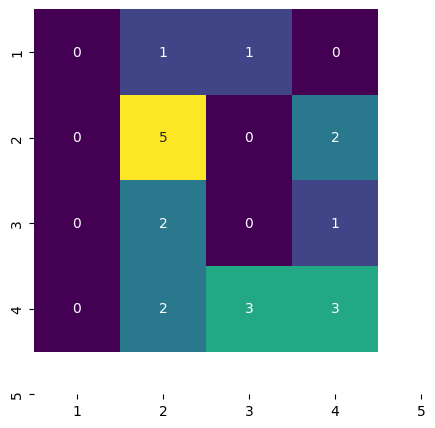

In [70]:
# Machine Leanring Model DecisionTreeClassifier
tree_class = DecisionTreeClassifier(max_depth=3, random_state=0)

# Cross Validation for test-splits
skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train_class_scaled, y):
    X_train, X_test = X_train_class_scaled.iloc[train_index], X_train_class_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # machine learning model training and evaluation code here
    # X_train, y_train for training and X_test, y_test for testing/validation
    
    tree_class.fit(X_train, y_train)
    y_class_predicted = tree_class.predict(X_test)
    
    fig, ax = plt.subplots(figsize=(5, 5))

    sb.heatmap(confusion_matrix(y_test, y_class_predicted),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=kneighbor_classifier.classes_,
           yticklabels=kneighbor_classifier.classes_)

# Linear Regression

Categorical Algorithms:

Categorical algorithms, also known as classification algorithms, are used when the target variable is categorical in nature, meaning it falls into distinct classes or categories. The goal of these algorithms is to predict which category a given input belongs to. Examples of categorical algorithms include:

    Logistic Regression: Despite its name, logistic regression is used for binary classification problems. It calculates the probability that a given input belongs to a certain class using a logistic function.

    Decision Trees: Decision trees split the input space into regions based on feature values, leading to a decision path that finally assigns a class label.

    Random Forest: Random forest is an ensemble of decision trees. It aggregates the results of multiple decision trees to improve accuracy and handle overfitting.

    Support Vector Machines (SVM): SVM aims to find a hyperplane that best separates data points belonging to different classes.

    Naive Bayes: Naive Bayes is based on Bayes' theorem and makes strong independence assumptions between features. It calculates the probability of a data point belonging to a class given its features.

    K-Nearest Neighbors (KNN): KNN assigns a class to an input based on the classes of its 'k' nearest neighbors in the training data.

Regression Algorithms:

Regression algorithms are used when the target variable is continuous or numerical in nature. The goal of these algorithms is to predict a numerical value. Here are some common regression algorithms:

    Linear Regression: Linear regression establishes a linear relationship between the input features and the target variable. It tries to fit a line that best represents the relationship.

    Ridge and Lasso Regression: These are variations of linear regression that introduce regularization to prevent overfitting. Ridge uses L2 regularization, and Lasso uses L1 regularization.

    Decision Trees for Regression: Decision trees can also be used for regression tasks. Instead of predicting a class, they predict a continuous value based on splitting the data into regions.

    Random Forest Regression: Similar to the classification version, random forest can also be used for regression tasks by aggregating the results of multiple decision trees.

    Support Vector Regression (SVR): SVR is the regression counterpart of SVM. It aims to find a hyperplane that best fits the data, allowing a certain margin of error.

    Gradient Boosting Regression: Gradient boosting builds an ensemble of decision trees sequentially, each trying to correct the errors of the previous one.

In [71]:
# newly instantiated
data_num = data.select_dtypes(include='number') # Nur Feature mit Zahlenwerten verwenden


mask_age = (data_num['Alter'] < 31) & (data_num['Alter'] > 19)
data_num = data_num[mask_age]
print(data_num['Alter'].describe())

X_reg = data_num.copy().drop(["Alter"], axis=1)
y_reg = data_num["Alter"]

X_reg.shape, y_reg.shape 

count    52.000000
mean     25.192308
std       2.619972
min      20.000000
25%      23.000000
50%      25.000000
75%      28.000000
max      30.000000
Name: Alter, dtype: float64


((52, 58), (52,))

In [80]:
#Grid Search for best hyperparameters

kneighbor_model = KNeighborsRegressor()
grid = GridSearchCV(estimator=kneighbor_model,
                   param_grid={
                       'n_neighbors': [3, 5, 7, 10, 15],
                       'weights': ['uniform', 'distance']
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, 
                    refit="MAE",
                   verbose=2)

scaler = StandardScaler().fit(X_reg)
X_train_scaled = pd.DataFrame(scaler.transform(X_reg), columns=X_reg.columns)

grid.fit(X_train_scaled, y_reg)
pd.DataFrame(grid.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=5, weig

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_MAE,split1_test_MAE,split2_test_MAE,mean_test_MAE,std_test_MAE,rank_test_MAE
0,0.005029,0.001731,0.007214,0.003774,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",-2.222222,-2.549020,-1.980392,-2.250545,0.233003,7
1,0.003559,0.000461,0.004939,0.001267,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",-2.217559,-2.529804,-1.957172,-2.234845,0.234095,3
2,0.003290,0.000401,0.009126,0.005528,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",-2.111111,-2.400000,-2.282353,-2.264488,0.118613,8
3,0.003293,0.000734,0.004519,0.000296,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",-2.108273,-2.394647,-2.245302,-2.249407,0.116948,6
4,0.004200,0.001188,0.012842,0.010757,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",-1.785714,-2.546218,-2.411765,-2.247899,0.331392,5
5,0.008434,0.002465,0.086934,0.100759,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",-1.804935,-2.532053,-2.383847,-2.240278,0.313724,4
6,0.002831,0.000635,0.015099,0.014909,10,uniform,"{'n_neighbors': 10, 'weights': 'uniform'}",-1.994444,-2.541176,-2.347059,-2.294227,0.226307,10
7,0.003442,0.000687,0.014075,0.015173,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",-1.996786,-2.531351,-2.326416,-2.284851,0.220205,9
8,0.003321,0.000494,0.003572,0.000589,15,uniform,"{'n_neighbors': 15, 'weights': 'uniform'}",-1.877778,-2.301961,-2.427451,-2.202397,0.235188,2
9,0.003015,0.000051,0.003444,0.000131,15,distance,"{'n_neighbors': 15, 'weights': 'distance'}",-1.881202,-2.308399,-2.405576,-2.198392,0.227769,1


In [81]:
#grid.best_estimator_ , 3 neighbors, distance

/Users/Laura/opt/anaconda3/envs/dataScience/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Mean absolute error: 2.2980389469509666
Mean absolute error: 1.9727175521120703
Mean absolute error: 1.858493535516256


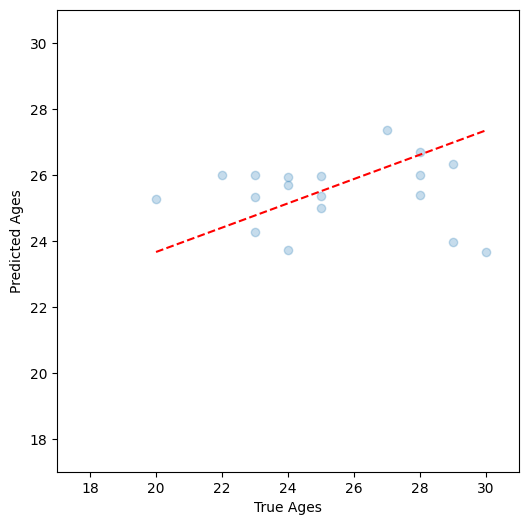

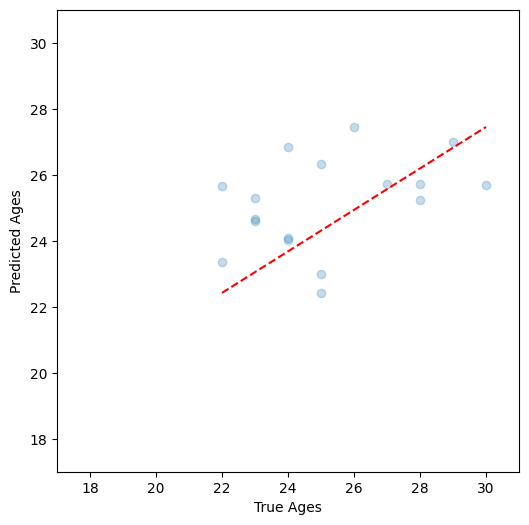

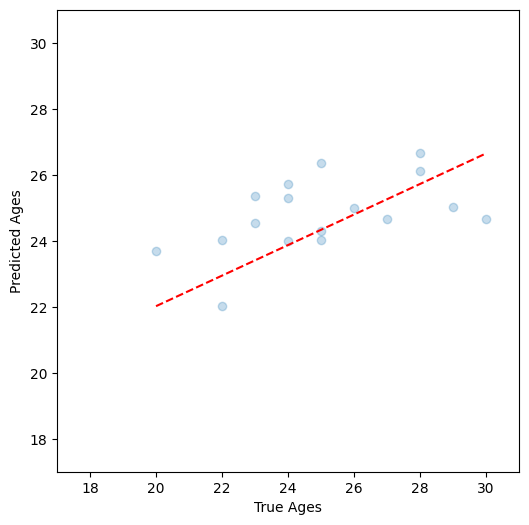

In [77]:
# Machine Leanring Model KNeighors
kneighbor_model_reg = KNeighborsRegressor(n_neighbors=3, weights='distance')

# Cross Validation for test-splits
skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train_scaled, y_reg):
    X_train, X_test = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
    y_train, y_test = y_reg.iloc[train_index], y_reg.iloc[test_index]
    # machine learning model training and evaluation code here
    # X_train, y_train for training and X_test, y_test for testing/validation
    y_predicted = kneighbor_model_reg.fit(X_train, y_train).predict(X_test)
    
    fig, ax = plt.subplots(figsize=(6,6))

    # Draw a best-fit line
    line_x = [min(y_test), max(y_test)]
    line_y = [min(y_predicted), max(y_predicted)]
    ax.plot(line_x, line_y, color='red', linestyle='dashed', label='Best-Fit Line')

    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(17, 31)
    ax.set_ylim(17, 31)
    ax.scatter(x=y_test, y=y_predicted, alpha=0.25)
    ax.set_xlabel("True Ages")
    ax.set_ylabel("Predicted Ages")
    
    print(f"Mean absolute error: {mean_absolute_error(y_test, y_predicted)}")